In [23]:
import pandas as pd

# Provide the path to your local file
file_path = "onlinefraud.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Check the first few rows of the dataset
df.head()


step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [24]:
df.shape

(6362620, 11)

In [25]:
# Step 1: Separate fraud and non-fraud
fraud_df = df[df['isFraud'] == 1]
non_fraud_df = df[df['isFraud'] == 0]

# Step 2: Sample fewer non-fraud rows (e.g., 20,000)
non_fraud_sample = non_fraud_df.sample(n=20000, random_state=42)

# Step 3: Combine and shuffle
balanced_df = pd.concat([fraud_df, non_fraud_sample], axis=0).sample(frac=1, random_state=42)

# Step 4: Overwrite df and reset index
df = balanced_df.reset_index(drop=True)

# Step 5: Confirm result
print("New dataset shape:", df.shape)
print("Label distribution:\n", df['isFraud'].value_counts())


New dataset shape: (28213, 11)
Label distribution:
 isFraud
0    20000
1     8213
Name: count, dtype: int64


In [26]:
df = balanced_df.reset_index(drop=True)


In [27]:
print(df['isFraud'].value_counts())


isFraud
0    20000
1     8213
Name: count, dtype: int64


In [28]:
print('Columns:\n',df.columns)

Columns:
 Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [29]:
df.shape

(28213, 11)

In [30]:
print('Data Types:\n',df.dtypes)

Data Types:
 step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [31]:
print('Dataset information:\n',df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28213 entries, 0 to 28212
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            28213 non-null  int64  
 1   type            28213 non-null  object 
 2   amount          28213 non-null  float64
 3   nameOrig        28213 non-null  object 
 4   oldbalanceOrg   28213 non-null  float64
 5   newbalanceOrig  28213 non-null  float64
 6   nameDest        28213 non-null  object 
 7   oldbalanceDest  28213 non-null  float64
 8   newbalanceDest  28213 non-null  float64
 9   isFraud         28213 non-null  int64  
 10  isFlaggedFraud  28213 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 2.4+ MB
Dataset information:
 None


In [32]:
df.describe().T

count          mean           std  min      25%        50%  \
step            28213.0  2.801404e+02  1.769193e+02  1.0    158.0     260.00   
amount          28213.0  5.576095e+05  1.557937e+06  0.0  21871.0  125464.42   
oldbalanceOrg   28213.0  1.062616e+06  3.089330e+06  0.0    164.0   47309.00   
newbalanceOrig  28213.0  6.550948e+05  2.664874e+06  0.0      0.0       0.00   
oldbalanceDest  28213.0  9.460634e+05  3.414557e+06  0.0      0.0   11473.24   
newbalanceDest  28213.0  1.251876e+06  3.873348e+06  0.0      0.0  163980.35   
isFraud         28213.0  2.911069e-01  4.542808e-01  0.0      0.0       0.00   
isFlaggedFraud  28213.0  5.671145e-04  2.380783e-02  0.0      0.0       0.00   

                       75%           max  
step                378.00  7.430000e+02  
amount           331829.94  6.988673e+07  
oldbalanceOrg    424962.90  5.958504e+07  
newbalanceOrig    35431.44  4.958504e+07  
oldbalanceDest   688167.15  2.362305e+08  
newbalanceDest  1090348.29  2.367265e+08  
isFraud               1.00  1.000000e+00  
isFlaggedFraud        0.00  1.000000e+00

In [33]:
print('Missing values:\n',df.isnull().sum())

Missing values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [34]:
#check for duplicates
print('Number of duplicate rows:',df.duplicated().sum())

Number of duplicate rows: 0


Categorical columns to encode: ['type', 'nameOrig', 'nameDest']
   step  type     amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0    37     1  198548.36      4853        23160.0            0.00      3038   
1    12     1  132408.98     21030           75.0            0.00      8390   
2    44     3    4473.30     23235            0.0            0.00     27039   
3    36     4  225777.18      2083            0.0            0.00     12944   
4   372     1  149152.01     11449       297517.0       148364.99     15009   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0       252609.37       451157.73        0               0  
1      1389442.35      1521851.34        0               0  
2            0.00            0.00        0               0  
3       298020.44       523797.62        0               0  
4       682316.12       831468.13        0               0  


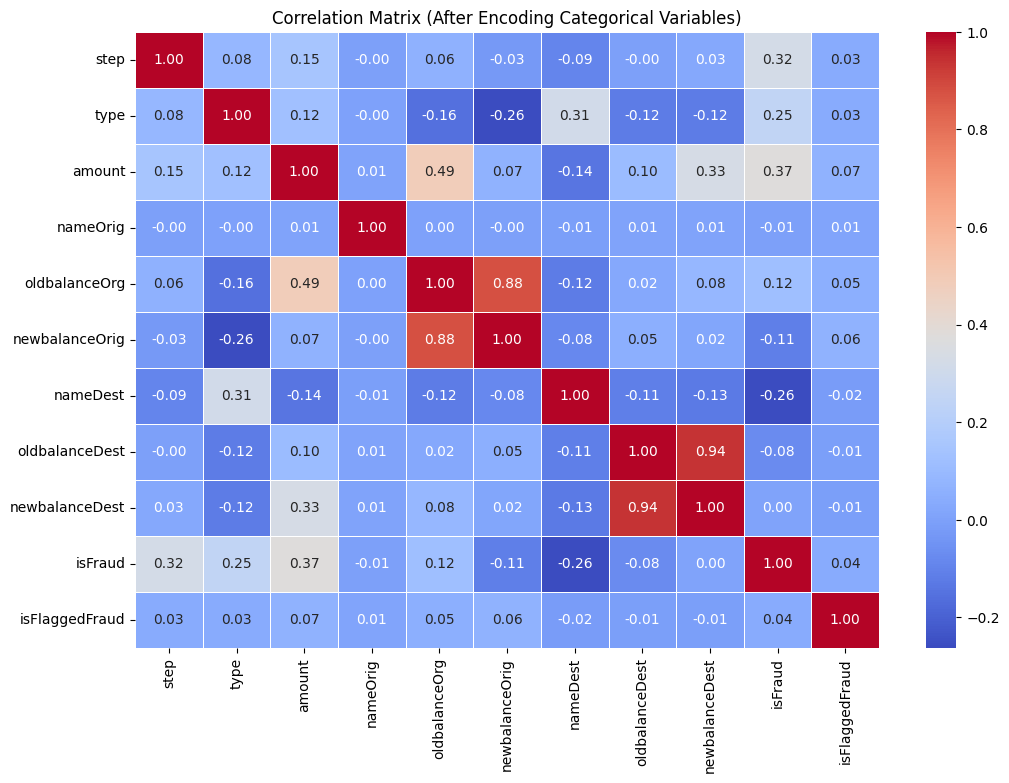

In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns excluding 'isFraud'
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != 'isFraud']
print(f"Categorical columns to encode: {categorical_cols}")

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode selected categorical columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Check the result
print(df.head())

# Now compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (After Encoding Categorical Variables)')
plt.show()


In [36]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Separate label before any transformation
y = df['isFraud']  # keep isFraud as it is
X = df.drop('isFraud', axis=1)

# Encode categorical columns in X
categorical_cols = X.select_dtypes(include='object').columns

label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Recombine into a final DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
final_df = X_scaled_df.copy()
final_df['isFraud'] = y

# final_df is ready for modeling or visualization
print(final_df.head())


       step      type    amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
0 -1.374325 -0.649397 -0.230476 -1.136119      -0.336472       -0.245830   
1 -1.515635 -0.649397 -0.272930  0.850156      -0.343945       -0.245830   
2 -1.334758  0.739959 -0.355050  1.120894      -0.343969       -0.245830   
3 -1.379977  1.434637 -0.212998 -1.476231      -0.343969       -0.245830   
4  0.519227 -0.649397 -0.262183 -0.326237      -0.247663       -0.190155   

   nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  isFraud  
0 -1.348217       -0.203091       -0.206729       -0.023821        0  
1 -0.675882        0.129852        0.069702       -0.023821        0  
2  1.666861       -0.277073       -0.323208       -0.023821        0  
3 -0.103795       -0.189792       -0.187975       -0.023821        0  
4  0.155616       -0.077243       -0.108541       -0.023821        0  


In [37]:
# Compute correlation matrix only on numeric columns
correlation_matrix = df.select_dtypes(include='number').corr()


In [38]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Encode only object (string) columns
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Now compute correlation
correlation_matrix = df_encoded.corr()


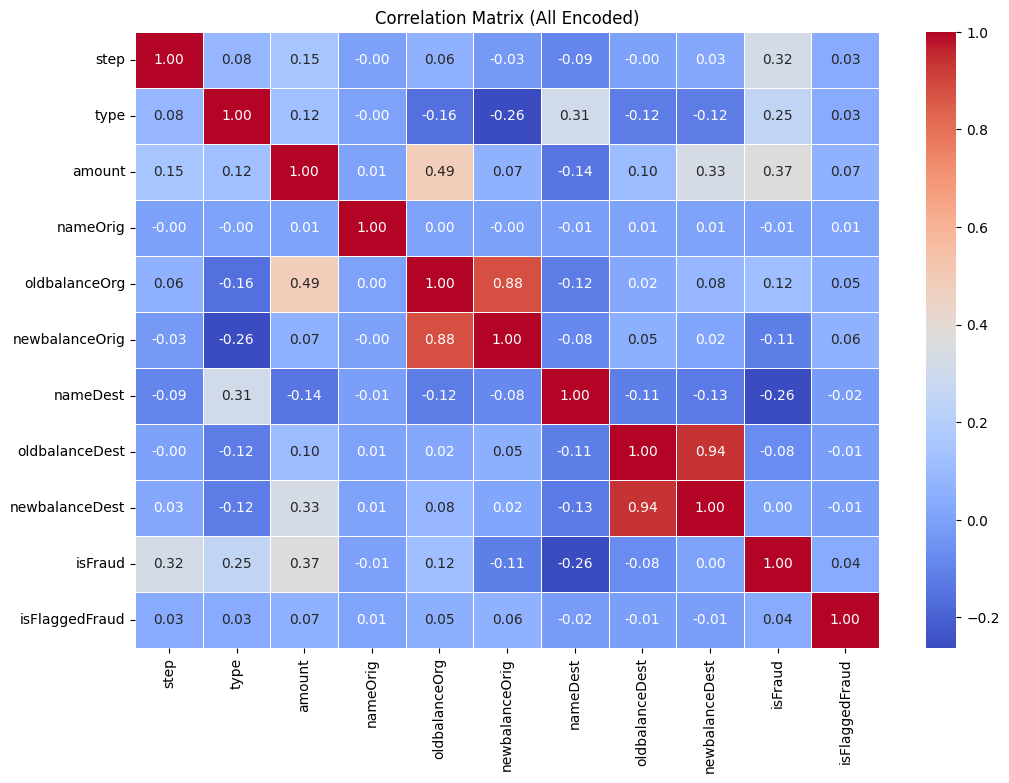

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (All Encoded)')
plt.show()


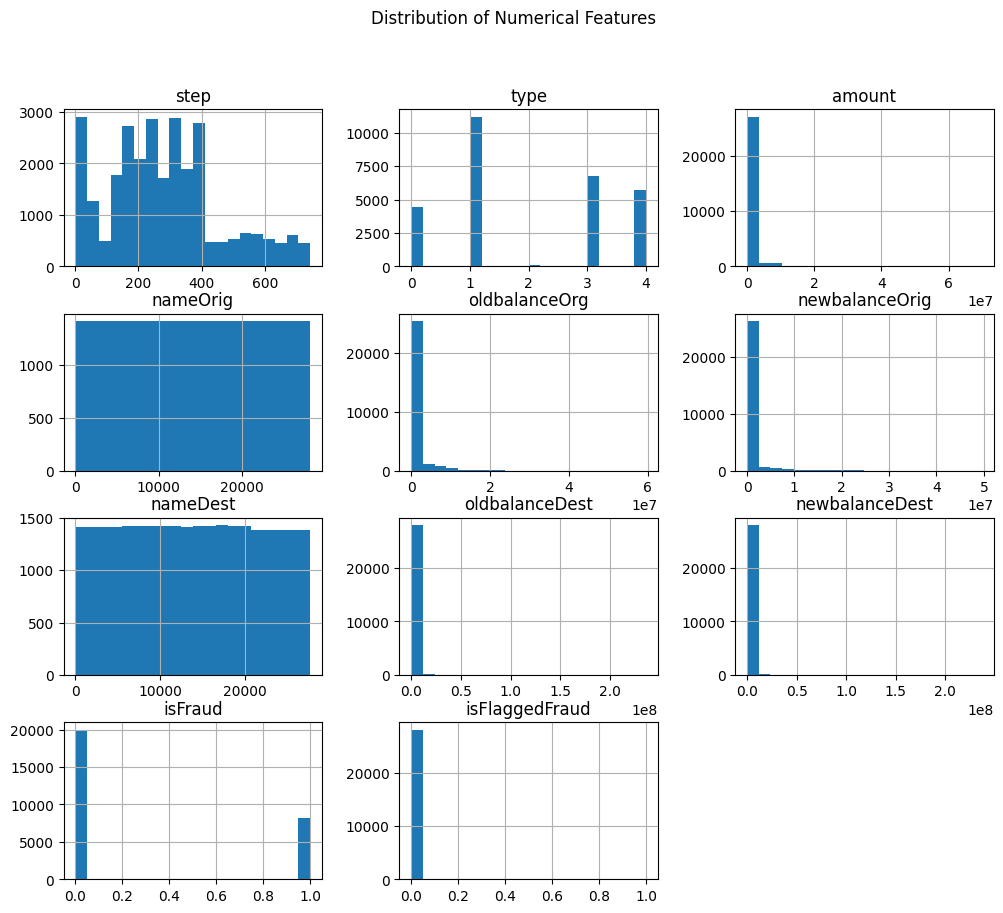

In [40]:
# Plot histograms
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()


In [41]:
print(df['isFraud'].value_counts())


isFraud
0    20000
1     8213
Name: count, dtype: int64


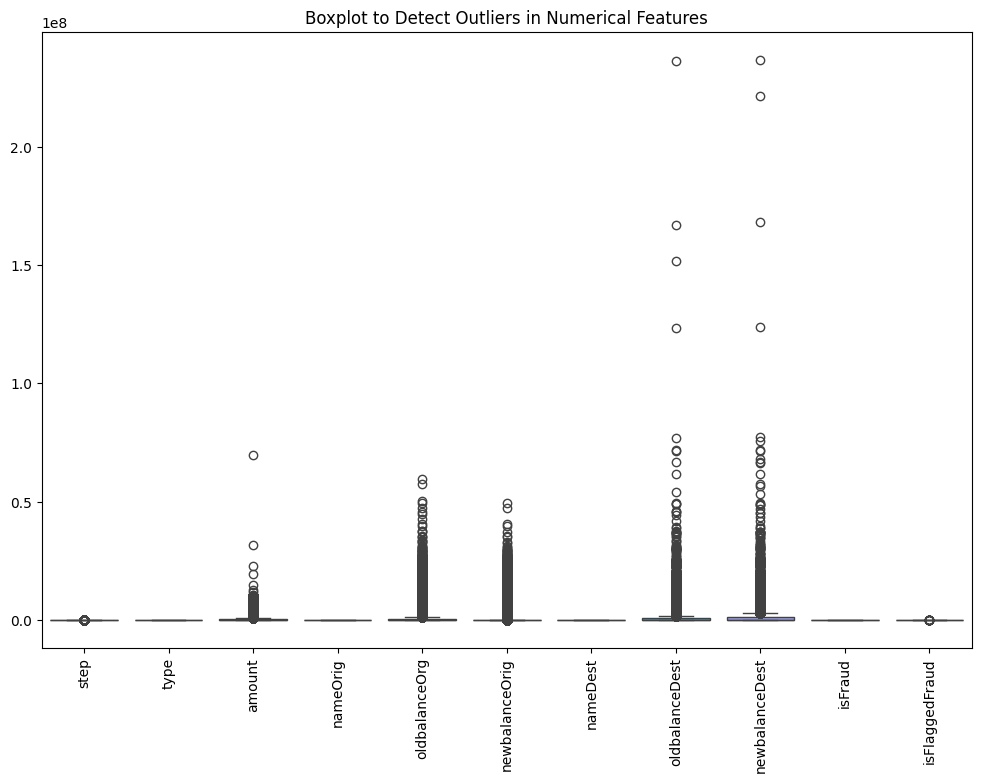

In [42]:
# Boxplot to detect outliers in numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Boxplot to Detect Outliers in Numerical Features')
plt.xticks(rotation=90)
plt.show()


In [43]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Checking for outliers in the dataset
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

outliers_info = {}
for col in numeric_cols:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, col)
    outliers_info[col] = {
        'outliers_count': len(outliers),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

print(outliers_info)


{'step': {'outliers_count': 434, 'lower_bound': np.float64(-172.0), 'upper_bound': np.float64(708.0)}, 'type': {'outliers_count': 0, 'lower_bound': np.float64(-2.0), 'upper_bound': np.float64(6.0)}, 'amount': {'outliers_count': 3638, 'lower_bound': np.float64(-443067.41000000003), 'upper_bound': np.float64(796768.3500000001)}, 'nameOrig': {'outliers_count': 0, 'lower_bound': np.float64(-14106.0), 'upper_bound': np.float64(42318.0)}, 'oldbalanceOrg': {'outliers_count': 4826, 'lower_bound': np.float64(-637034.3500000001), 'upper_bound': np.float64(1062161.25)}, 'newbalanceOrig': {'outliers_count': 5958, 'lower_bound': np.float64(-53147.16), 'upper_bound': np.float64(88578.6)}, 'nameDest': {'outliers_count': 0, 'lower_bound': np.float64(-13695.5), 'upper_bound': np.float64(41196.5)}, 'oldbalanceDest': {'outliers_count': 3888, 'lower_bound': np.float64(-1032250.7250000001), 'upper_bound': np.float64(1720417.875)}, 'newbalanceDest': {'outliers_count': 3469, 'lower_bound': np.float64(-163552

In [44]:
# Function to replace outliers with median
def replace_outliers_with_median(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = data[column].median()

    # Replace outliers with median
    data[column] = data[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return data

# Replace outliers with median for each column
for col in outliers_info.keys():
    df = replace_outliers_with_median(df, col)

# Check the dataset after replacing outliers with median
print(df.head())


    step  type     amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0   37.0     1  198548.36      4853        23160.0             0.0      3038   
1   12.0     1  132408.98     21030           75.0             0.0      8390   
2   44.0     3    4473.30     23235            0.0             0.0     27039   
3   36.0     4  225777.18      2083            0.0             0.0     12944   
4  372.0     1  149152.01     11449       297517.0             0.0     15009   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0       252609.37       451157.73        0             0.0  
1      1389442.35      1521851.34        0             0.0  
2            0.00            0.00        0             0.0  
3       298020.44       523797.62        0             0.0  
4       682316.12       831468.13        0             0.0  


<ipython-input-45-3e069fcf73fe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y=col, data=df, palette='Set2')
<ipython-input-45-3e069fcf73fe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y=col, data=df, palette='Set2')
<ipython-input-45-3e069fcf73fe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y=col, data=df, palette='Set2')
<ipython-input-45-3e069fcf73fe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

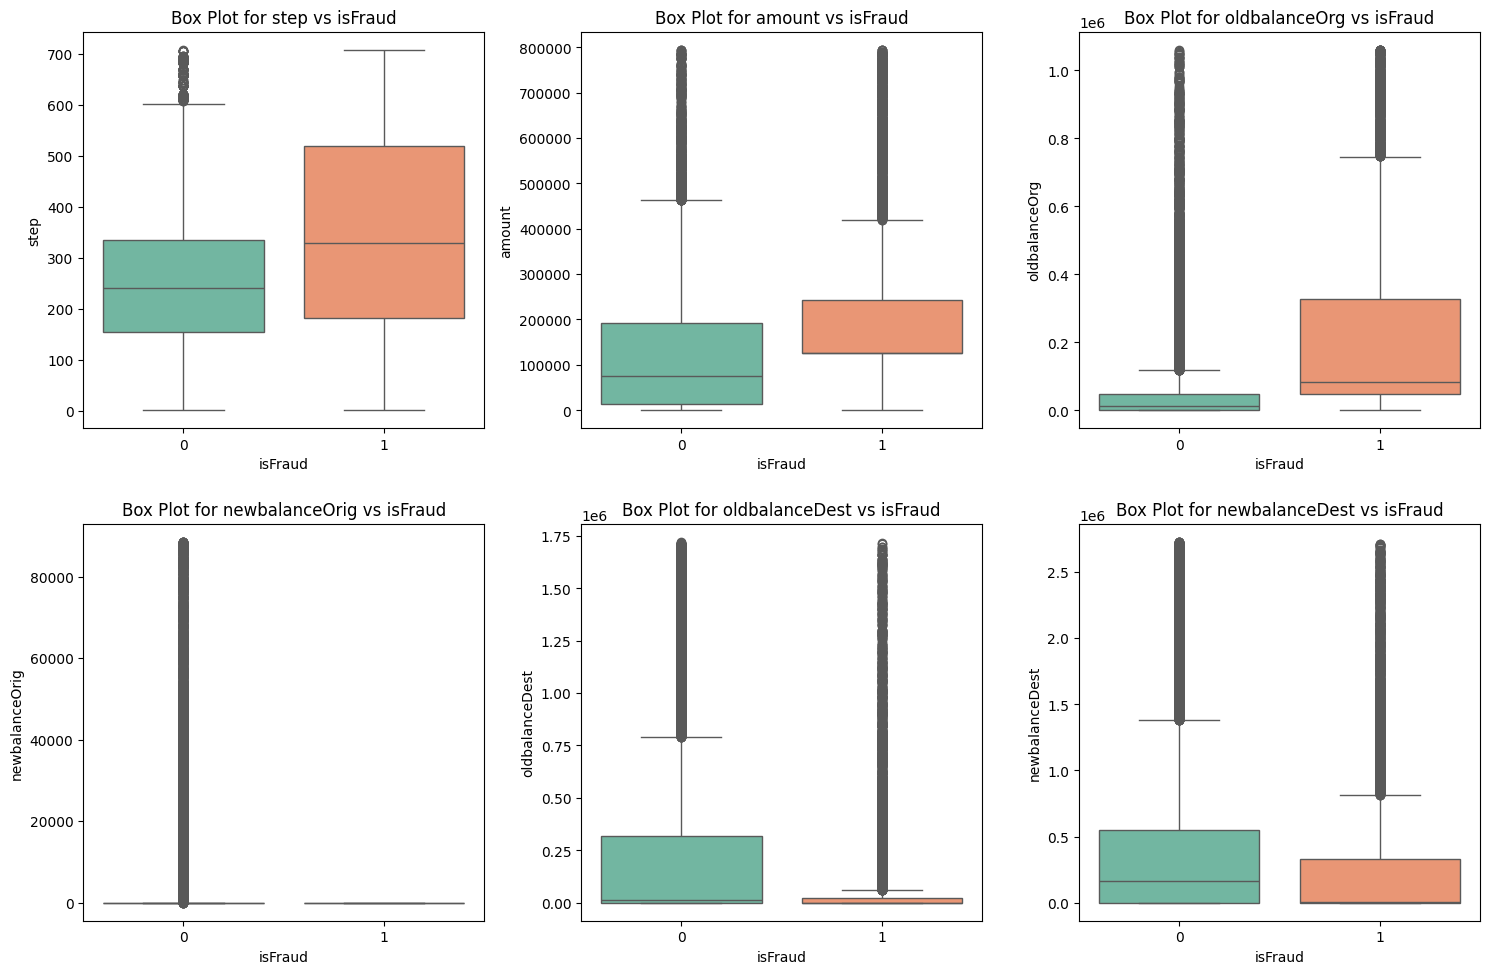

In [45]:
 #Boxplot for numerical features vs isFraud
numeric_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns for visualization
    sns.boxplot(x='isFraud', y=col, data=df, palette='Set2')
    plt.title(f'Box Plot for {col} vs isFraud')
plt.tight_layout()
plt.show()


<ipython-input-46-d1c3805d2d21>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='isFraud', y=col, data=df, palette='Set2')
<ipython-input-46-d1c3805d2d21>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='isFraud', y=col, data=df, palette='Set2')
<ipython-input-46-d1c3805d2d21>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='isFraud', y=col, data=df, palette='Set2')
<ipython-input-46-d1c3805d2d21>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

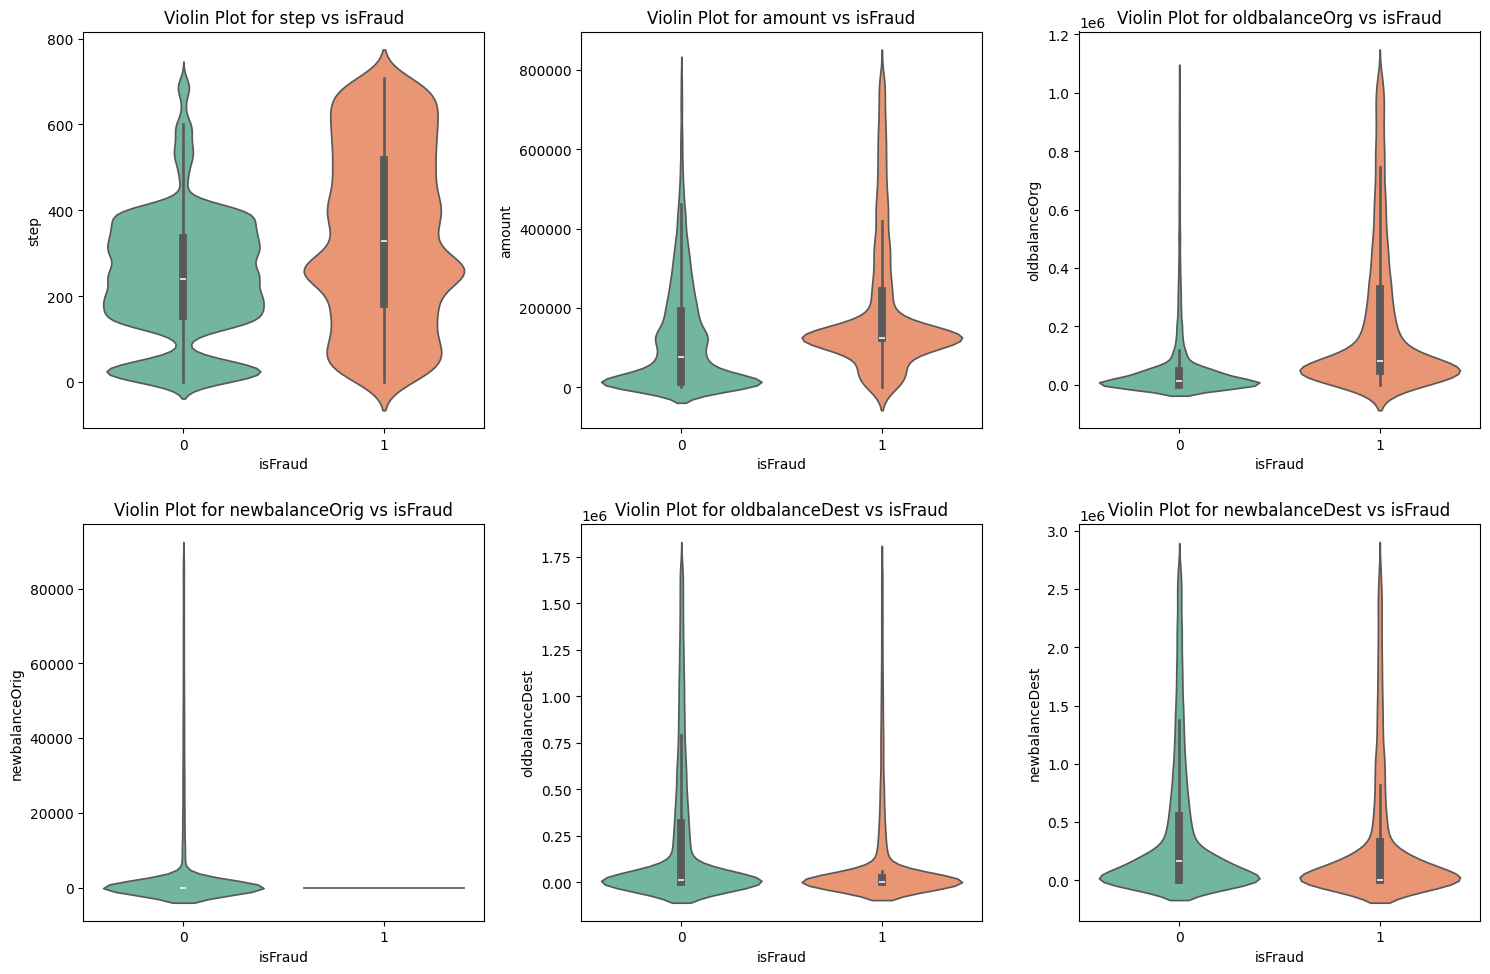

In [46]:
#Violin Plot to understand the distribution with respect to isFraud
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='isFraud', y=col, data=df, palette='Set2')
    plt.title(f'Violin Plot for {col} vs isFraud')
plt.tight_layout()
plt.show()

In [47]:
df_cleaned = df_encoded.drop(['nameOrig', 'nameDest'], axis=1)


In [48]:
df=df_cleaned

In [49]:
df.dtypes

step                int64
type                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

Class distribution:
 isFraud
0    20000
1     8213
Name: count, dtype: int64
Class weights: {np.int64(0): np.float64(0.705325), np.int64(1): np.float64(1.7175818823815903)}

Confusion Matrix:
[[5957   43]
 [  31 2433]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9948    0.9928    0.9938      6000
           1     0.9826    0.9874    0.9850      2464

    accuracy                         0.9913      8464
   macro avg     0.9887    0.9901    0.9894      8464
weighted avg     0.9913    0.9913    0.9913      8464


Top Features:
          Feature  Importance
3   oldbalanceOrg    0.286302
2          amount    0.204960
1            type    0.168126
4  newbalanceOrig    0.147973
0            step    0.081911
6  newbalanceDest    0.065462
5  oldbalanceDest    0.045187
7  isFlaggedFraud    0.000079


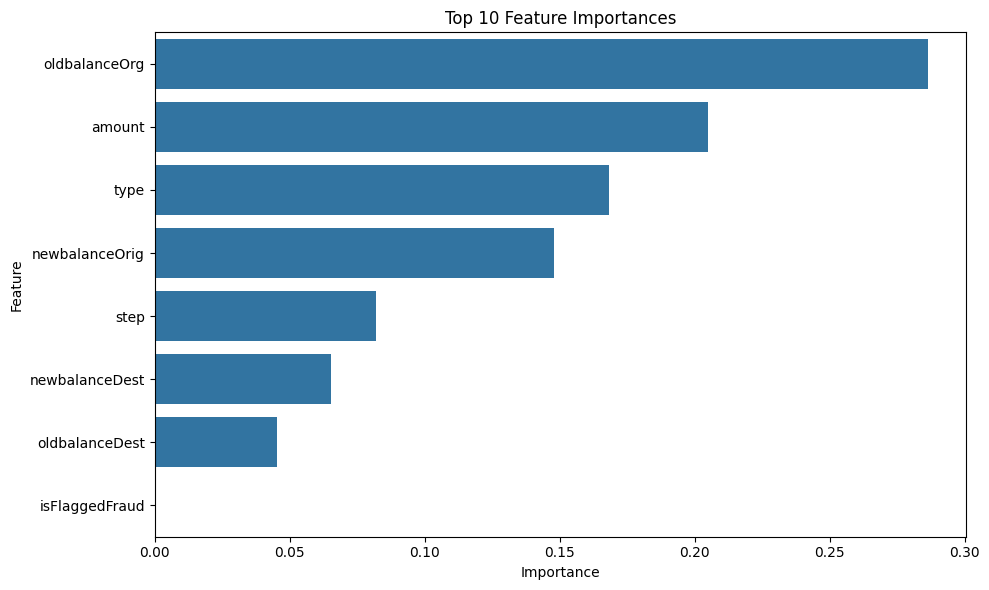

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight
import numpy as np

# Step 1: Separate features and label
X = df.drop('isFraud', axis=1)
y = df['isFraud'].astype(int)

# Step 2: Check class distribution
print("Class distribution:\n", y.value_counts())

# Step 3: Compute class weights
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y),
    y=y
)
class_weights = dict(zip(np.unique(y), weights))
print("Class weights:", class_weights)

# Step 4: Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 5: Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)
rf.fit(X_train, y_train)

# Step 6: Predictions
y_pred = rf.predict(X_test)

# Step 7: Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Step 8: Feature Importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop Features:")
print(feature_importances.head(10))

# Step 9: Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


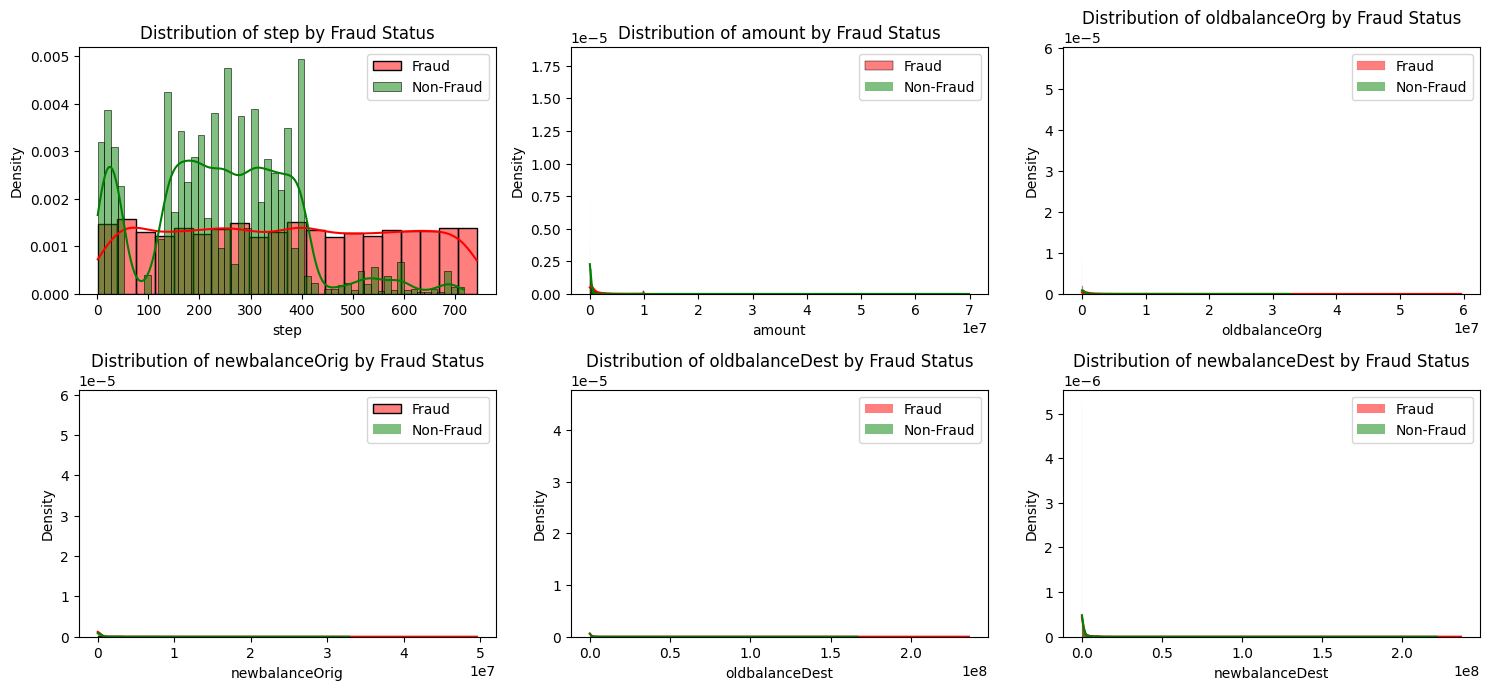

In [52]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)  # Adjust for more or fewer columns
    sns.histplot(df[df['isFraud'] == 1][col], color='red', kde=True, label='Fraud', stat='density')
    sns.histplot(df[df['isFraud'] == 0][col], color='green', kde=True, label='Non-Fraud', stat='density')
    plt.legend()
    plt.title(f'Distribution of {col} by Fraud Status')
plt.tight_layout()
plt.show()


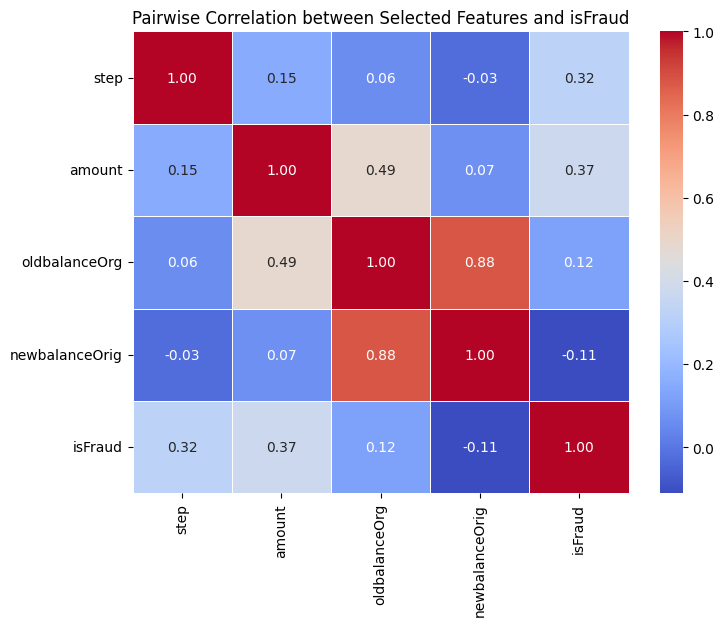

In [53]:
# Selecting a subset of features to check pairwise correlations
subset_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud']
correlation_subset = df[subset_columns].corr()

# Visualize pairwise correlations using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pairwise Correlation between Selected Features and isFraud')
plt.show()


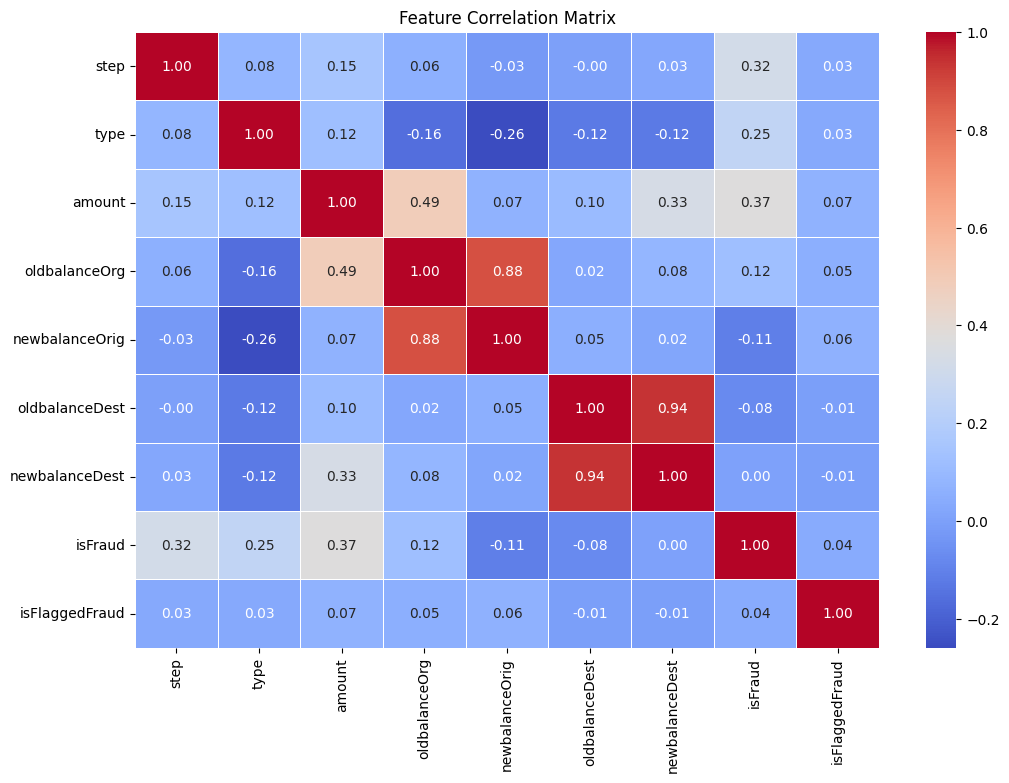

In [54]:
# Calculate correlation for numeric columns
corr_matrix = df.corr()

# Visualize the correlation matrix using seaborn heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()


<ipython-input-55-a5caaa5b0f65>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y=col, data=df, palette='Set2')
<ipython-input-55-a5caaa5b0f65>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y=col, data=df, palette='Set2')
<ipython-input-55-a5caaa5b0f65>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y=col, data=df, palette='Set2')
<ipython-input-55-a5caaa5b0f65>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

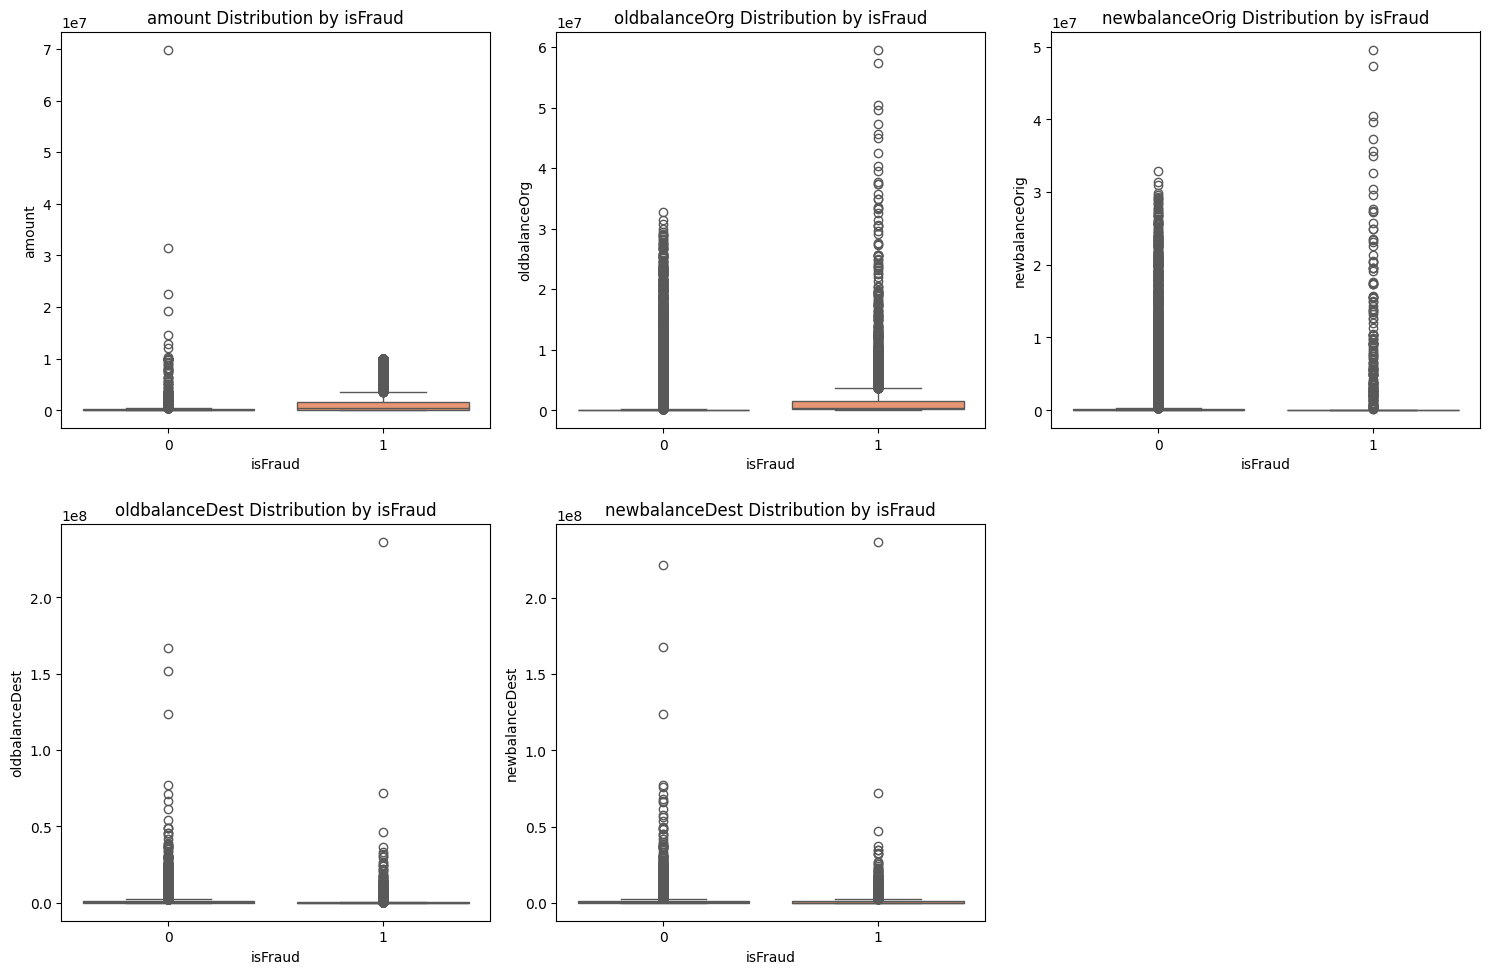

In [55]:
plt.figure(figsize=(15, 10))
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']  # Add more columns as needed

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)  # Adjust subplot grid as needed
    sns.boxplot(x='isFraud', y=col, data=df, palette='Set2')
    plt.title(f'{col} Distribution by isFraud')
plt.tight_layout()
plt.show()


<ipython-input-58-cb5662cfb27e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isFraud', data=df, palette='Set2')


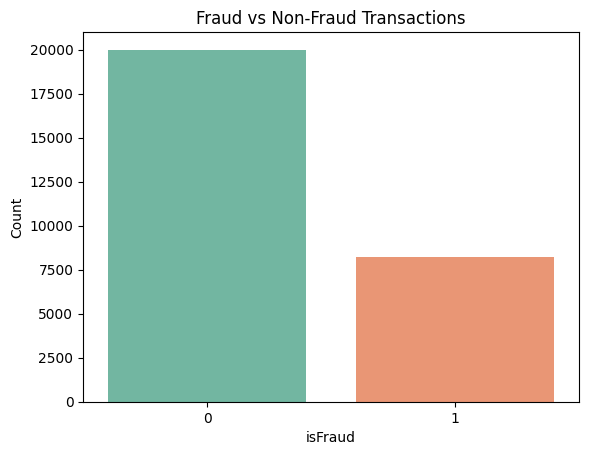

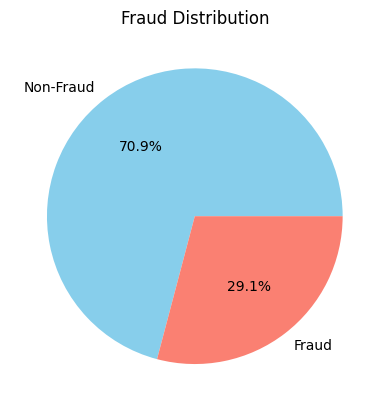

In [58]:
# Bar Plot
sns.countplot(x='isFraud', data=df, palette='Set2')
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("isFraud")
plt.ylabel("Count")
plt.show()

# Pie Chart
df['isFraud'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Non-Fraud', 'Fraud'], colors=['skyblue', 'salmon'])
plt.title("Fraud Distribution")
plt.ylabel("")
plt.show()


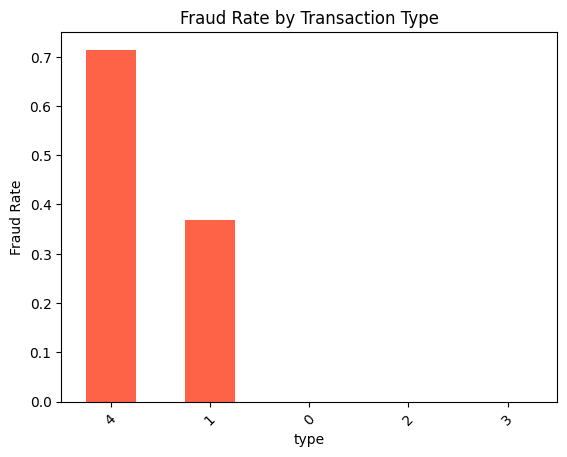

In [60]:

# Re-create and fit encoder (assuming it was encoded earlier)
type_encoder = LabelEncoder()
type_encoder.fit(df['type'])  # If already encoded, this will map 0,1,2 back to original labels

# Create reverse mapping
reverse_map = dict(zip(range(len(type_encoder.classes_)), type_encoder.classes_))

# Map encoded values back to original labels
df['type'] = df['type'].map(reverse_map)
# Grouped bar plot
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)

fraud_by_type.plot(kind='bar', color='tomato')
plt.title("Fraud Rate by Transaction Type")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=45)
plt.show()


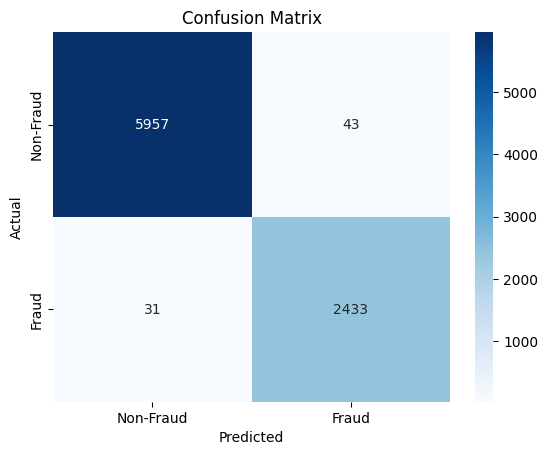

In [62]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [67]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'notebook'  # Use 'notebook' or 'iframe' for inline output

fig = px.histogram(
    df,
    x="type",
    color="isFraud",
    animation_frame="step",
    barmode="group",
    title="Fraudulent Transactions by Type Over Time"
)

fig.show()


<ipython-input-68-0c5d2716e656>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




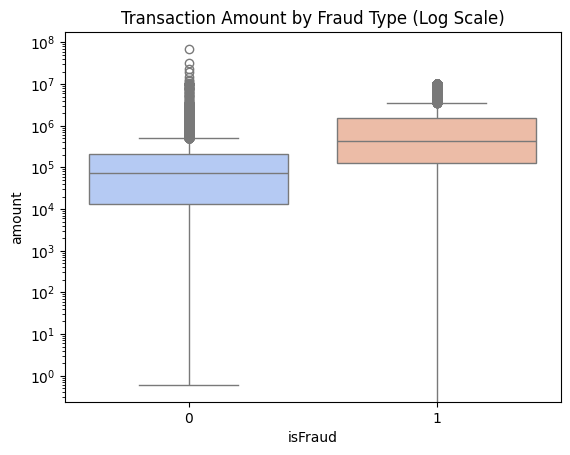

In [68]:
sns.boxplot(x='isFraud', y='amount', data=df, palette='coolwarm')
plt.yscale('log')
plt.title("Transaction Amount by Fraud Type (Log Scale)")
plt.show()


<ipython-input-69-86c3f5dc5344>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-69-86c3f5dc5344>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




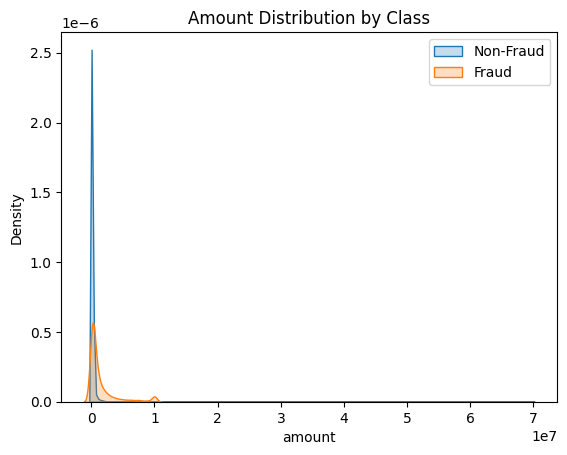

In [69]:
sns.kdeplot(df[df['isFraud'] == 0]['amount'], label='Non-Fraud', shade=True)
sns.kdeplot(df[df['isFraud'] == 1]['amount'], label='Fraud', shade=True)
plt.title("Amount Distribution by Class")
plt.legend()
plt.show()


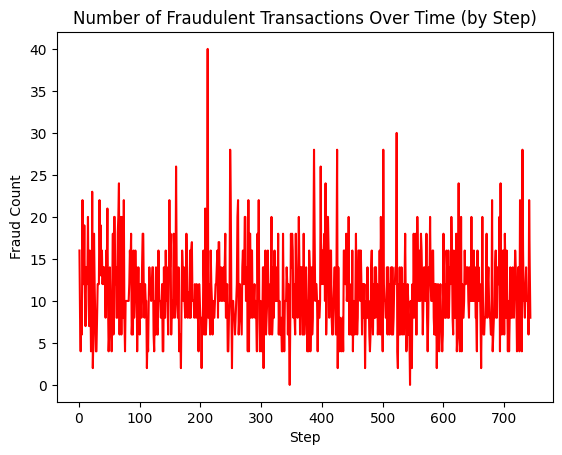

In [70]:
fraud_trend = df.groupby('step')['isFraud'].sum()

plt.plot(fraud_trend.index, fraud_trend.values, color='red')
plt.title("Number of Fraudulent Transactions Over Time (by Step)")
plt.xlabel("Step")
plt.ylabel("Fraud Count")
plt.show()


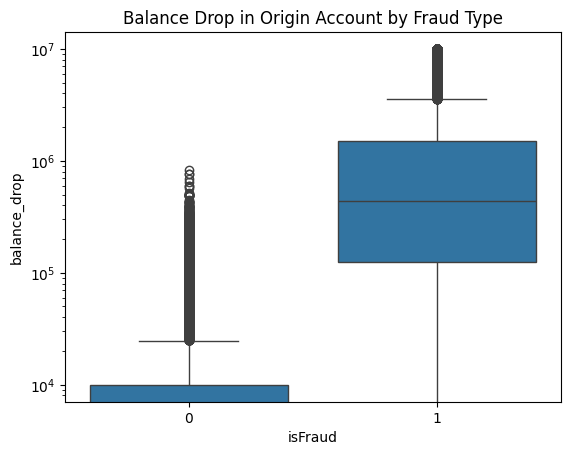

In [71]:
df['balance_drop'] = df['oldbalanceOrg'] - df['newbalanceOrig']

sns.boxplot(x='isFraud', y='balance_drop', data=df)
plt.title("Balance Drop in Origin Account by Fraud Type")
plt.yscale('log')
plt.show()


In [72]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

Mean Squared Error: 0.15248323863345478
R² Score: 0.2593306274722307
Accuracy: 0.8243147448015122


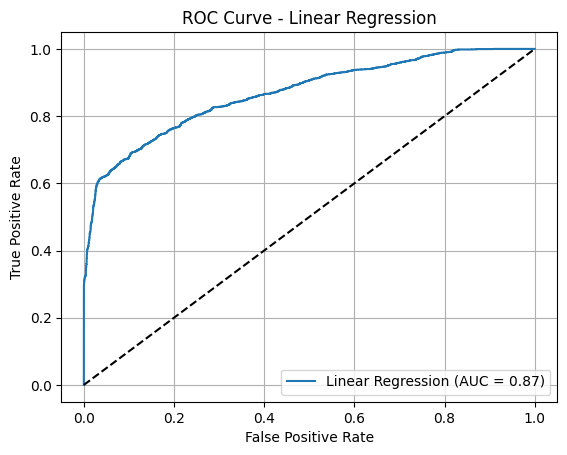

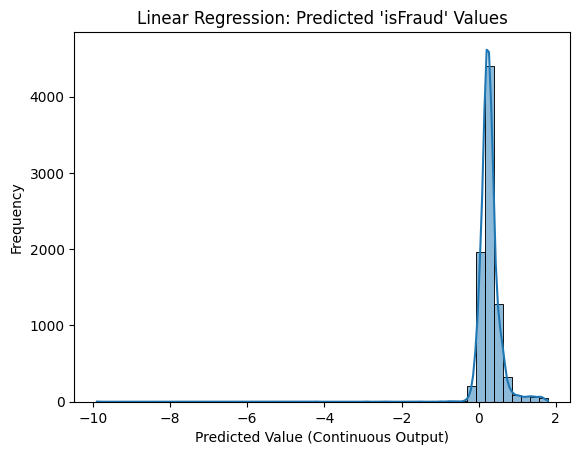

In [73]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error, r2_score, accuracy_score,
    roc_curve, auc
)
import seaborn as sns
import matplotlib.pyplot as plt

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict continuous values
y_pred_continuous = lr.predict(X_test)

# Convert to binary predictions using threshold
y_pred_binary = (y_pred_continuous >= 0.5).astype(int)

# Evaluation Metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_continuous))
print("R² Score:", r2_score(y_test, y_pred_continuous))
print("Accuracy:", accuracy_score(y_test, y_pred_binary))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_continuous)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"Linear Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Linear Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot predicted values
sns.histplot(y_pred_continuous, bins=50, kde=True)
plt.title("Linear Regression: Predicted 'isFraud' Values")
plt.xlabel("Predicted Value (Continuous Output)")
plt.ylabel("Frequency")
plt.show()


Accuracy: 0.9375
F1 Score: 0.893625578121858

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      6000
           1       0.89      0.90      0.89      2464

    accuracy                           0.94      8464
   macro avg       0.92      0.93      0.92      8464
weighted avg       0.94      0.94      0.94      8464



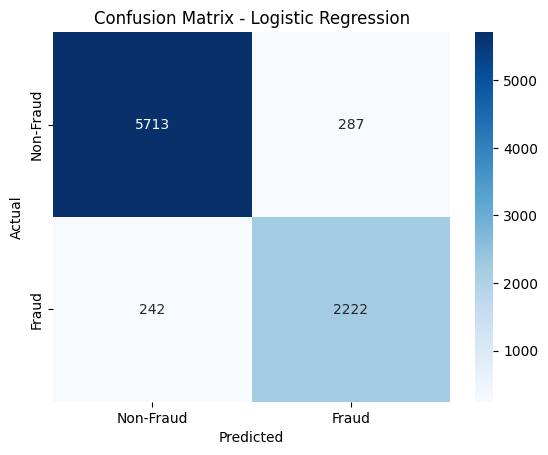

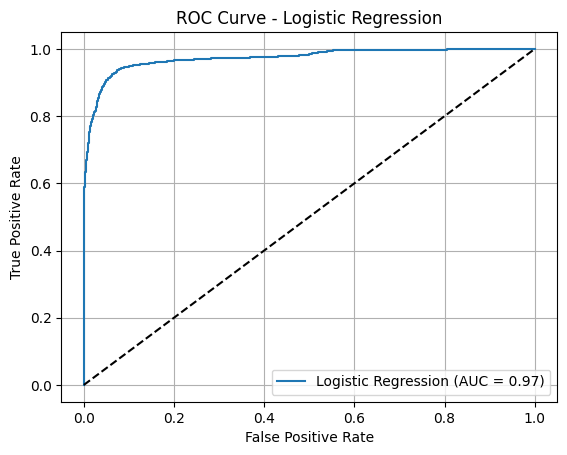

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report,
    confusion_matrix, roc_curve, auc
)
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X and y are already defined from previous steps

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize and train Logistic Regression model
logreg_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred = logreg_model.predict(X_test)
y_prob = logreg_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (Fraud)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Create and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Accuracy: 0.9736531190926276
F1 Score: 0.9555511261710186

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      6000
           1       0.94      0.97      0.96      2464

    accuracy                           0.97      8464
   macro avg       0.96      0.97      0.97      8464
weighted avg       0.97      0.97      0.97      8464



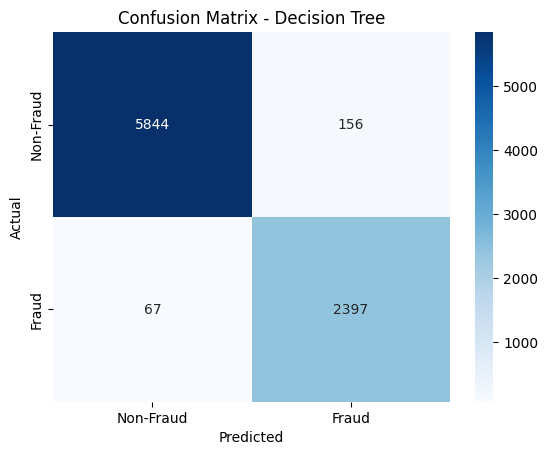

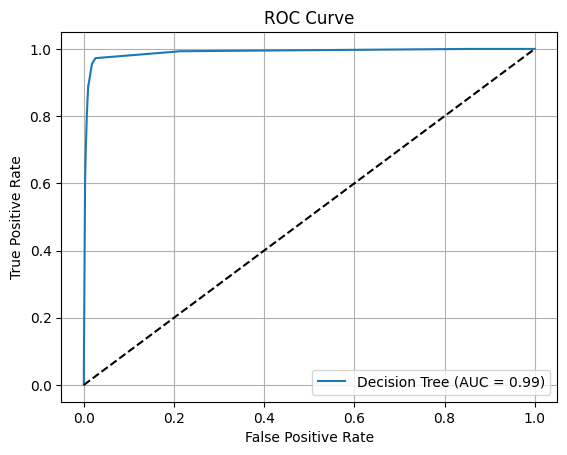

In [74]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    accuracy_score,
    roc_curve,
    auc
)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)

#Predict
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


Accuracy: 0.99515595463138
F1 Score: 0.9917322040734019

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      6000
           1       0.99      1.00      0.99      2464

    accuracy                           1.00      8464
   macro avg       0.99      1.00      0.99      8464
weighted avg       1.00      1.00      1.00      8464



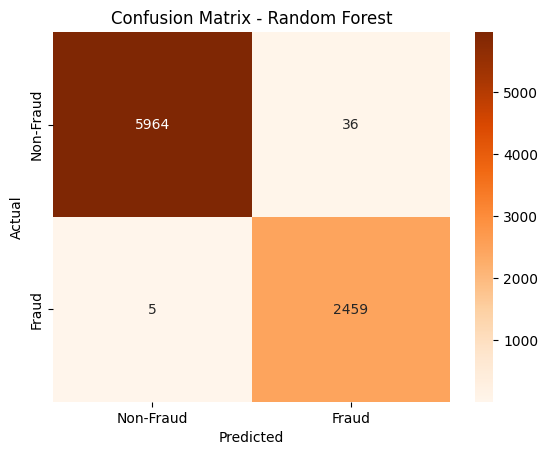

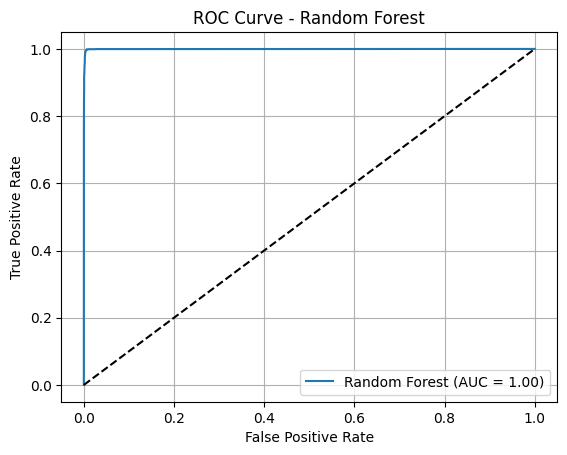

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report,
    confusion_matrix, roc_curve, auc
)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

<ipython-input-78-ad9633122055>:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




                 Model  Accuracy  F1 Score   ROC AUC
2        Random Forest  0.995156  0.991732  0.999445
1        Decision Tree  0.973653  0.955551  0.990130
3  Logistic Regression  0.923440  0.865839  0.952378
0    Linear Regression  0.823842  0.580591  0.857195


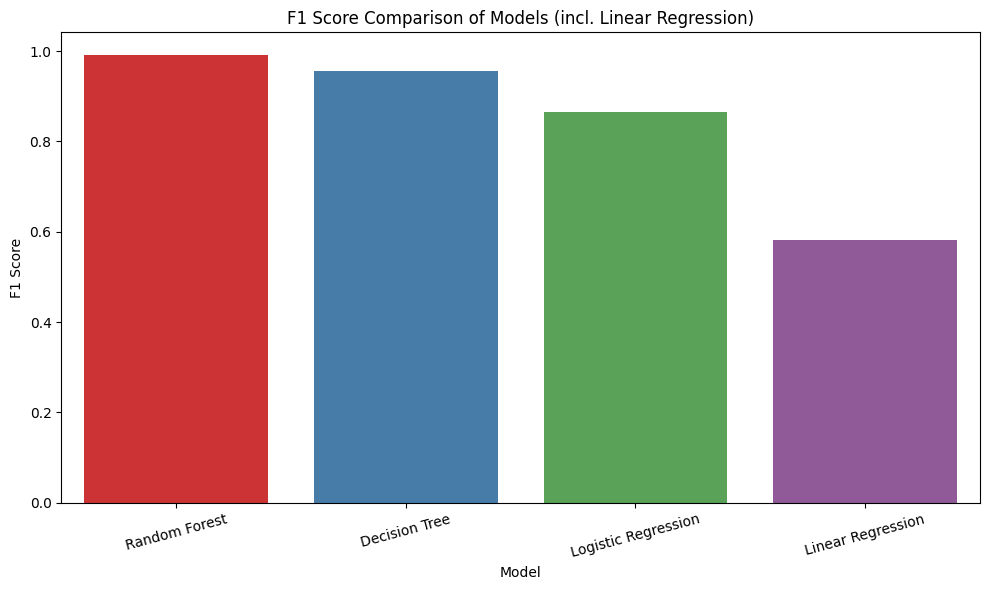

In [78]:

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'Logistic Regression': LogisticRegression()
}

# Train, Predict, and Evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    if name == 'Linear Regression':
        y_prob = model.predict(X_test)
        y_pred = (y_prob >= 0.5).astype(int)
    else:
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1 Score': f1,
        'ROC AUC': auc
    })

#  Create DataFrame
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print(results_df)

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1 Score', data=results_df, palette='Set1')
plt.title('F1 Score Comparison of Models (incl. Linear Regression)')
plt.ylabel('F1 Score')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
